In [38]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [39]:
iris = datasets.load_iris()

In [40]:
x = iris.data[:, :2]
y = iris.target

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [42]:
clf = SVC(kernel='linear')
clf.fit(x_train, y_train)

SVC(kernel='linear')

In [43]:
y_prediction = clf.predict(x_test)
print("Accuracy:")
print(accuracy_score(y_test, y_prediction) * 100)

Accuracy:
90.0


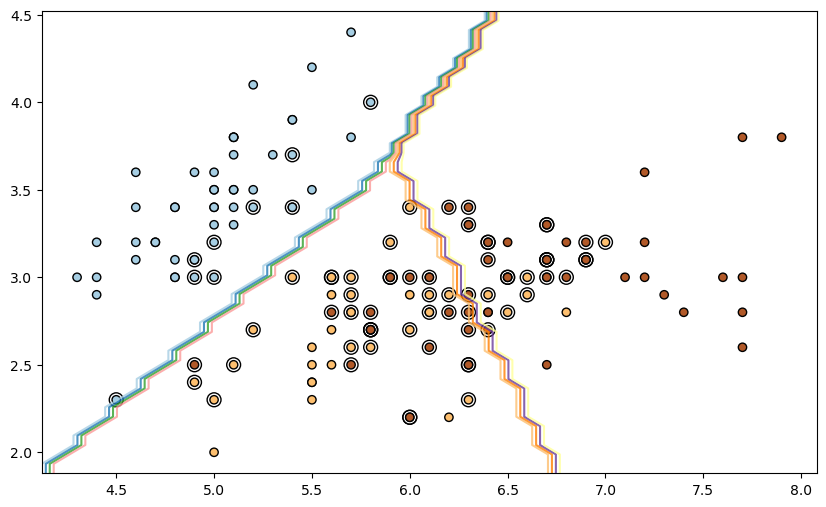

In [44]:
plt.figure(figsize=(10, 6))

scatter_x = x[:, 0]
scatter_y = x[:, 1]

plt.scatter(scatter_x, scatter_y, c=y, edgecolors='k', cmap=plt.cm.Paired)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy)

Z = np.argmax(Z, axis=1).reshape(XX.shape)

contour = ax.contour(XX, YY, Z, alpha=0.8, cmap=plt.cm.Paired)

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.show()